# Laptops Data Analysis | Michael Llaury | 11/25/2024

# Introduction
This project explores key factors influencing the price of laptops by analyzing a variety of technical specifications and how they correlate with price differences. The primary focus is on understanding how features such as GPU type, secondary storage, and screen resolution impact laptop pricing. The analysis aims to uncover patterns and relationships that can guide consumers in making informed purchasing decisions, as well as provide insights to manufacturers about the pricing strategies for different laptop configurations. By analyzing the data across various brands, this project examines if certain features are consistently associated with higher prices across the market, and whether these trends vary from one brand to another. The results will offer valuable insights into the dynamics of laptop pricing in relation to key hardware features.

# Data Description


This dataset contains a collection of 991 distinct laptops gathered from the “Smartprix” website. The data provides a comprehensive overview of various laptop specifications, including 22 columns that cover features such as brand, price (in Indian Rupees), rating, RAM memory, number of cores, GPU type, and storage options, among others. These features allow for detailed analysis, including comparing laptop specifications, examining brand-specific pricing trends, and analyzing how different variables impact pricing.

Each row in the dataset represents a unique laptop model, and the unit of observation is an individual laptop. The dataset consists of 991 rows, corresponding to 991 distinct laptops. Key variables relevant to this analysis include `Price_USD` which represents the price of each laptop converted from Indian Rupees to U.S. Dollars, `gpu_type` for distinguishing between laptops with integrated or dedicated GPUs, `sec_stor_type` for identifying the presence of secondary storage, and `res_grade`, a derived variable classifying laptops based on their screen resolution. There are no missing or inconsistent values in the dataset, ensuring a clean dataset for analysis.

## Variables Table
| Variable Name        | Data Type  | Description                                                                                       |
|----------------------|------------|---------------------------------------------------------------------------------------------------|
| index                | numeric    | The index of each row of the laptops dataframe.                                                    |
| brand                | character  | The name of the laptop brand.                                                                      |
| Model                | character  | The specific model or series of the laptop.                                                        |
| Price                | numerical  | The price of the laptop in Indian rupees.                                                          |
| Rating               | numerical  | The rating assigned to each laptop based on its specifications, according to www.smartprix.com. From 0-100 |
| cpu_brand            | character  | The brand of the processor used in the laptop, such as Intel, AMD, Apple, or other.                |
| cpu_tier             | character  | The performance tier or category of the processor, e.g., Intel i3, i5, i7, i9, or AMD Ryzen tiers. |
| num_cores            | numerical  | The number of processing cores in the processor. Always an even number.                            |
| num_threads          | numerical  | The number of threads supported by the processor. Always an even number.                           |
| ram_memory           | numerical  | The memory in gigabytes of random accessible memory (RAM) used in the laptop.                      |
| prim_stor_type       | character  | The type of primary storage, HDD or SSD.                                                           |
| prim_stor_capacity  |  numerical  | The storage capacity in gigabytes of the primary storage in the laptop.                            |
| sec_stor_type        | character  | The type of secondary storage, either SSD or “No secondary storage.”                               |
| sec_stor_capacity    | numerical  | The capacity in gigabytes of the secondary storage. If the laptop has none, the capacity is 0.     |
| gpu_brand            | character  | The brand of the graphics processing unit (GPU).                                                   |
| gpu_type             | character  | The type of GPU, can be integrated in the CPU, dedicated GPU, or Apple (with both).                |
| touch_screen         | logical    | Indicates whether the laptop has a touch screen feature. TRUE or FALSE.                            |
| display_size         | numerical  | The diagonal length of the laptop’s display, in inches.                                            |
| res_width            | numerical  | The width of the display resolution of the laptop screen, measured in pixels.                      |
| res_height           | numerical  | The height of the display resolution of the laptop screen, measured in pixels.                     |
| OS                   | character  | The operating system installed on the laptop.                                                      |
| warranty             | character  | The duration of the warranty provided for the laptop, usually in years or unknown.                 |


### Loading Required Packages


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")

### Loading the Data

In [2]:
# Load the laptops.csv file into a dataframe named 'df' using .read_csv()
df = pd.read_csv("laptops.csv")

## Data Preparation

While there are no null values, some columns need modification, such as price and brand.

### AI Usage Statement

In this project, AI tools were specifically used to generate comments that explain the code. The AI tool used for this purpose was ChatGPT, which helped clarify the functions and processes within the code, making them easier to understand and follow. ChatGPT was also utilized to create and order the bar chart by resolution grade using Seaborn for research question 3. Additionally, ChatGPT was employed to learn how to remove warnings from Seaborn. No other AI tools or services were used in the development of the project.

#### Converting Indian Rupees to USD

The laptops.csv file was sourced from an online Kaggle user who collected the data via web scraping from an Indian product review site. The product prices are in Indian Rupees, but I am only interested in the USD prices since I reside in the United States.


In [3]:
## 1 USD = 84.15 INR as of 11/25/2024
convert_rate = 84.27

# Rounds the converted prices to 2 decimal places
df['Price'] = round(df['Price'] / convert_rate, 2)

# Renames the 'Price' column to 'Price_USD'
df.rename(columns = {
    'Price' : 'Price_USD'},
          inplace = True)

#### Shortening the "Model" Column
The model column contains a laptop's brand, model, CPU tier, RAM, primary storage capacity, primary storage type, and operating system. While this information is relevant, it is already present in their respective columns. Including it in the model column is repetitive and adds clutter. The relevant information in the model column should be the laptop's brand and model, such as Lenovo Ideapad Slim 3i.

In [4]:
# Remove text within parentheses including the parentheses
df['Model'] = df['Model'].str.split('(').str[0].str.strip()

## Data Check
To verify the implementation of the column changes, it is essential to display a few rows to observe the modifications in effect.

In [5]:
df.head(3)

,index,brand,Model,Price_USD,Rating,processor_brand,processor_tier,num_cores,num_threads,ram_memory,...,sec_stor_type,sec_stor_capacity,gpu_brand,gpu_type,is_touch_screen,display_size,res_width,res_height,OS,year_of_warranty
0,1,tecno,Tecno Megabook T1 Laptop,284.68,63,intel,core i3,2,4,8,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
1,2,tecno,Tecno Megabook T1 Laptop,427.08,67,intel,core i7,4,8,16,...,No secondary storage,0,intel,integrated,False,15.6,1920,1080,windows,1
2,3,hp,HP Victus 15-fb0157AX Gaming Laptop,606.38,73,amd,ryzen 5,6,12,8,...,No secondary storage,0,amd,dedicated,False,15.6,1920,1080,windows,1


# Research Questions

## **Q1.** Is there a difference in prices between laptops with dedicated GPUs and those with integrated GPUs, and does this difference vary across different brands?

### Significance:

This research question aims to determine if there is a difference in laptop pricing based on GPU type, categorized by brand. A dedicated GPU offers superior processing power and can manage demanding tasks, such as gaming. This analysis will investigate whether brands price their dedicated GPU laptops higher than other brands, and whether there is a  price difference between dedicated GPU laptops and integrated GPU laptops within the same brand. The findings of this research are valuable as they provide consumers with insights to make more informed purchasing decisions. Additionally, the results will identify if a particular brand offers the most cost-effective dedicated GPU laptops within the dataset.

### Variables

- `Price_USD` : This variable is the result of converting the dataset's price column from Indian Rupees to United States Dollars. 
- `gpu_type` : Contains the type of GPU in each laptop. An integrated GPU is built into the same package as the CPU, sharing resources, whereas a dedicated GPU is a separate graphics card with its own memory, providing better performance for graphics-intensive tasks.
- `brand` : Each brand offer several different models of laptops. Each brand may source their hardware components from different distributers, eg. AMD Raedon and Intel Arc Graphics are both integrated GPUs but are used in laptops from various brands.

### Planned Analysis

#### 1. Grouping and Aggregating Data
- **Grouping by `brand` and `gpu_type`**: The dataset is grouped by laptop brand and GPU type, allowing for an analysis of how each combination impacts average price.
- **Calculating Mean Price**: For each group of `brand` and `gpu_type`, the mean price is calculated and rounded to two decimal places. This step provides insights into the typical cost of laptops based on each brand and GPU type combination.

#### 2. Filtering Specific Brands
- **Applying a Brand Filter**: To focus the analysis, only certain brands (Acer, Asus, Dell, HP, Lenovo, and MSI) are retained. This ensures the analysis centers on brands that offer both dedicated and integrated GPUs, allowing for meaningful comparisons across major brands.

#### 3. Visualization
- **Creating a Bar Chart**: A bar chart is used to visually compare average prices by brand and GPU type. Each brand displays average prices for integrated and dedicated GPUs side-by-side, allowing for an easy comparison within each brand.

#### 4. Insights Expected from the Analysis
- **Comparing GPU Types Across Brands**: This analysis will help reveal if certain brands consistently price laptops with dedicated GPUs higher than those with integrated GPUs, or if some brands price similarly across GPU types.
- **Identifying Outliers and Patterns**: Visualizing the data makes it easier to identify pricing patterns among brands, leading to conclusions about brand-specific pricing strategies based on GPU type.

#### Average Laptop Price by Brand and GPU Type

In [6]:
# Group by 'brand' and 'gpu_type', then calculate the mean price for each group
avg_price_by_brand_gpu = df.groupby(['brand', 'gpu_type'])['Price_USD'].mean().round(2).unstack()

avg_price_by_brand_gpu.head()

gpu_type,apple,dedicated,integrated
brand,,,
acer,NaN,1144.42,475.03
apple,2300.64,NaN,NaN
asus,NaN,1263.16,668.54
avita,NaN,NaN,302.15
axl,NaN,NaN,195.68


This table displays the average price of laptops, categorized by `gpu_type` and `brand`. Additionally, the table indicates that some brands do not offer laptops with a particular GPU type, resulting in NaN values for those entries.

#### Average Laptop Price by Brand and GPU Type Bar Chart Visualization

<Figure size 1200x800 with 0 Axes>

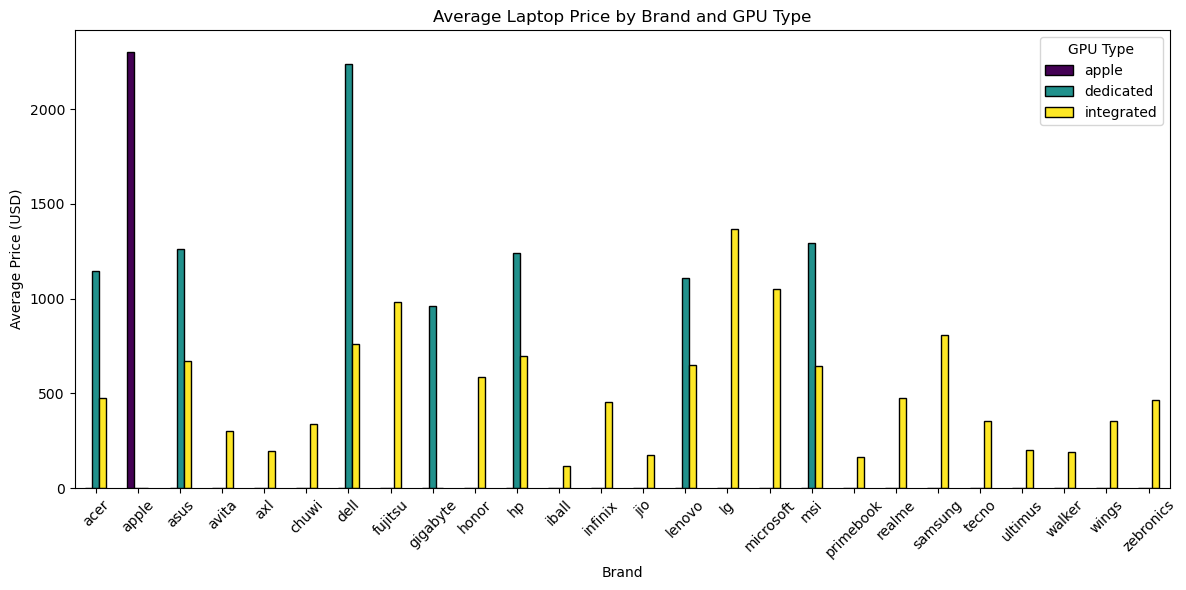

In [7]:
# Plotting
plt.figure(figsize=(12, 8))
avg_price_by_brand_gpu.plot(kind='bar', figsize=(12, 6), colormap='viridis', edgecolor='black')

# Customize plot
plt.title('Average Laptop Price by Brand and GPU Type')
plt.xlabel('Brand')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45)
plt.legend(title='GPU Type')
plt.tight_layout()

# Show the plot
plt.show()

As displayed in the previous bar chart, some laptop brands only offer an integrated GPU or a dedicated GPU option. Additionally, Apple exclusively offers an Apple GPU.

This research question examines the price difference between laptops with dedicated GPUs and those with integrated GPUs. Therefore, the visualization should include only brands that offers laptops equipped with an integrated GPU or a dedicated GPU.

These brands are: 'acer', 'asus', 'dell', 'hp', 'lenovo', and 'msi'.

#### Average Laptop Price by Brands with Dedicated or Integrated GPUs Bar Chart

gpu_type  apple  dedicated  integrated
brand                                 
acer        NaN    1144.42      475.03
asus        NaN    1263.16      668.54
dell        NaN    2236.06      761.79
hp          NaN    1243.01      696.75
lenovo      NaN    1110.95      652.01
msi         NaN    1291.52      642.89


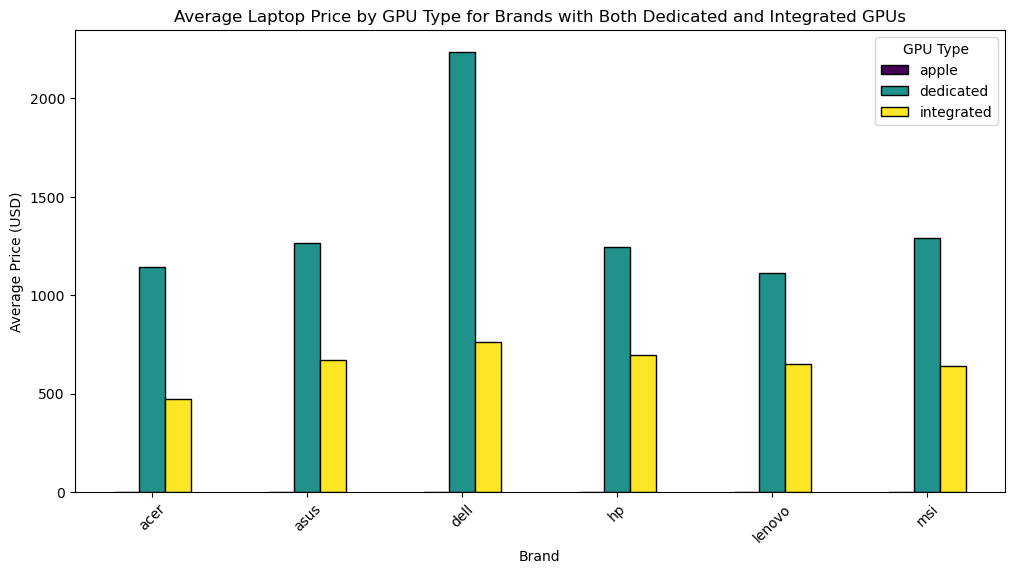

In [8]:
# List of brands to keep
mask = ['acer', 'asus', 'dell', 'hp', 'lenovo', 'msi']

# Filter `avg_price_by_brand_gpu` to keep only the specified brands
filtered_brands = avg_price_by_brand_gpu.loc[mask]

# Now `filtered_brands` contains only the specified brands with both integrated and dedicated GPU types
print(filtered_brands)

# Visualization
filtered_brands.plot(kind='bar', figsize=(12, 6), colormap='viridis', edgecolor='black')

# Customize plot
plt.title('Average Laptop Price by GPU Type for Brands with Both Dedicated and Integrated GPUs')
plt.xlabel('Brand')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45)
plt.legend(title='GPU Type')

# Show the plot
plt.show();

#### Bar Chart Interpretation

- Across brands that offer both integrated and dedicated GPU options, it is evident that, on average, laptops with a dedicated GPU are more expensive than those with an integrated GPU.

- The average price range for laptops with a dedicated GPU, by brand, is between 1,110 and 2,230 USD, while the range for laptops with an integrated GPU is between 475 and 761 USD.

- Dell's average price for laptops with a dedicated GPU is higher than that of other brands, as indicated by the corresponding bar being the tallest in the chart.

## **Q2.** What is the relationship between the presence of secondary storage (e.g., dual SSDs) and the price of laptops.

### Significance

This research question aims to determine if the presence of secondary storage significantly impacts laptop pricing. Secondary storage, such as an additional SSD or HDD, can increase storage capacity and potentially enhance performance for data-intensive tasks. This analysis will investigate whether laptops with secondary storage are priced higher on average compared to those without it. The findings are valuable for consumers seeking storage options within a specific budget, as well as for businesses in understanding the market's pricing strategies for storage-equipped models.


### Variables
- `Price_USD`: Represents the price in United States Dollars, converted from the original dataset’s price column in Indian Rupees.
- `sec_stor_type`: Specifies the type of secondary storage in each laptop, helping differentiate between laptops with and without additional storage.


### Planned Analysis
#### 1. Filtering and Calculating Averages
   - **Average Price with Secondary Storage**: Filter the dataset to include only laptops with a secondary storage type (i.e., models with an additional SSD or HDD). Calculate the mean price for this group.
   - **Average Price without Secondary Storage**: Filter the dataset to include only laptops where `sec_stor_type` is labeled 'No secondary storage' and calculate the mean price. Both averages will be rounded to two decimal places for consistency.

#### 2. Counting Laptops by Storage Type
   - **Count of Laptops with Secondary Storage**: Filter to include laptops with any secondary storage, and calculate the total count to understand sample size.
   - **Count of Laptops without Secondary Storage**: Similarly, filter for laptops without secondary storage and calculate the count.

#### 3. Visualization
   - **Box Plot**: Create a box plot to visually compare price distributions between laptops with and without secondary storage. This will reveal price ranges, medians, and outliers, aiding in assessing price differences based on storage configuration.

#### 4. Insights Expected from the Analysis
   - **Comparing Price Averages**: By comparing mean prices for laptops with and without secondary storage, this analysis will reveal if additional storage is typically linked to a higher price point.
   - **Distribution and Outliers**: The box plot will provide a visual comparison, helping identify outliers and patterns in pricing that may impact or explain the relationship between secondary storage presence and price.


#### Average Price by Secondary Storage Type

In [9]:
# Average price of laptops with secondary storage
avg_price_with_secondary = df[df['sec_stor_type'] != 'No secondary storage']['Price_USD'].mean().round(2)

# Average price of laptops without secondary storage
avg_price_without_secondary = df[df['sec_stor_type'] == 'No secondary storage']['Price_USD'].mean().round(2)

print("Average price of laptops with secondary storage:", avg_price_with_secondary)
print("Average price of laptops without secondary storage:", avg_price_without_secondary)

Average price of laptops with secondary storage: 785.67
Average price of laptops without secondary storage: 918.91


#### Average Price Interpretation
It appears that the average price of a laptop without secondary storage is higher than that of a laptop with secondary storage. Why could this be? Further examination of the data is needed to understand why the prices differ.

In [10]:
#### Boxplot Visualization

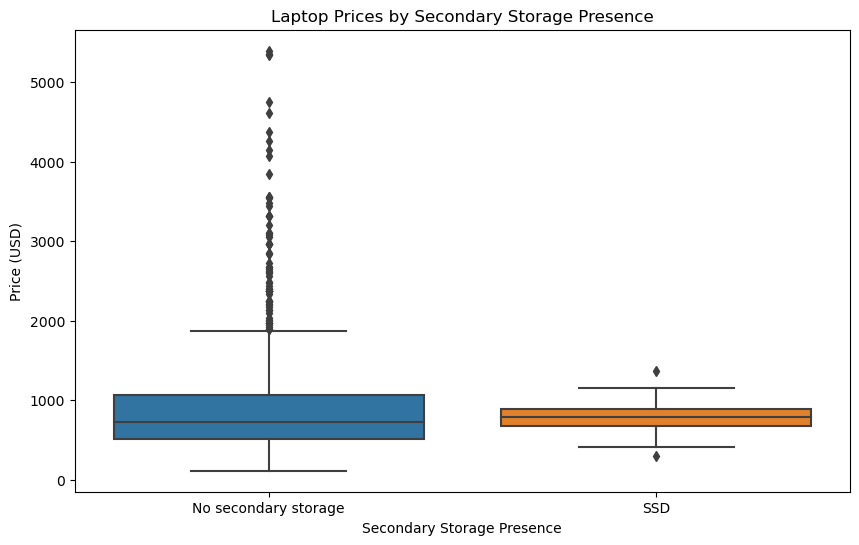

In [11]:
# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='sec_stor_type', y='Price_USD')
plt.title("Laptop Prices by Secondary Storage Presence")
plt.xlabel("Secondary Storage Presence")
plt.ylabel("Price (USD)")
plt.show();

#### Boxplot Interpretation

- In the boxplot displaying laptops without secondary storage, there are many outliers, indicating that numerous laptops have prices well beyond the upper extreme. These outliers may interfere with accurately determining the effect of secondary storage presence on price.

- The boxplot for laptops with secondary storage shows only two outliers: one below the lower extreme and one above the upper extreme. This is a significant contrast to the numerous outliers seen in laptops without secondary storage.

- The interquartile range of laptops with secondary storage is much smaller than that of laptops without secondary storage, which may result from the larger number of laptops without secondary storage, thus widening the interquartile range.

#### Laptop Count by Secondary Storage Type

In [12]:
# Count laptops with secondary storage
num_laptops_with_secondary_storage = df[df['sec_stor_type'] != 'No secondary storage'].shape[0]
num_laptops_without_secondary_storage = df[df['sec_stor_type'] == 'No secondary storage'].shape[0]
                                           
print("Number of laptops with secondary storage:", num_laptops_with_secondary_storage)
print("Number of laptops without secondary storage:", num_laptops_without_secondary_storage)

Number of laptops with secondary storage: 15
Number of laptops without secondary storage: 976


#### Analysis Summary

The difference between the average price of laptops with and without secondary storage is due to the significant disparity in the number of laptops. There are 976 laptops without secondary storage and only 15 laptops with secondary storage.

## **Q3.** What is the relationship between screen resolution (1080p, 2K, 3K, 4K, etc), Brand, and price?

### Significance
This research question aims to explore how different screen resolutions (e.g., HD, Full HD, 2K, 3K, 4K) correlate with laptop prices and how these variations might differ by brand. Higher screen resolutions typically provide clearer, more detailed visuals, which can lead to higher production costs and potentially impact laptop pricing. Understanding these relationships can help consumers balance visual quality with price and allow manufacturers to make more informed pricing decisions.


### Variables

- `Price_USD`: Converted from Indian Rupees, this variable reflects the price of each laptop in United States Dollars.
- `res_width`: Indicates the width (in pixels) of the laptop screen resolution, which is used to categorize screen resolution grades.
- `res_grade`: Created from `res_width`, this variable categorizes screen resolutions into defined grades (e.g., HD, Full HD, 2K, 3K, 4K), allowing for clear comparisons across resolution levels.


### Planned Analysis

#### 1. Categorizing Screen Resolutions
   - **Resolution Grades**: Define resolution grades based on `res_width` to distinguish between common screen resolution categories (HD, Full HD, 2K, 3K, 4K). This categorization helps streamline comparisons across different levels of screen quality.

#### 2. Grouping and Calculating Averages
   - **Average Price by Resolution Grade**: Group the dataset by `res_grade` and calculate the average price within each resolution category. This will allow us to observe how prices vary with screen resolution independently of brand.

#### 3. Visualization
   - **Barplot**: Create a barplot to display average prices across different resolution grades. This plot will show how the price changes from HD to 4K, providing a visual understanding of pricing trends associated with higher resolutions.

#### 4. Insights Expected from the Analysis
   - **Identifying Price Trends by Resolution**: By analyzing the barplot and average prices, this analysis will reveal if higher resolutions (e.g., 4K) are consistently associated with higher laptop prices.
   - **Comparing Brand Impact on Resolution Pricing (Future Analysis)**: If further exploration is desired, additional filtering by `brand` could show if specific brands have distinct pricing strategies based on screen resolution.

#### Create Resolution Grade Column

To simplify the visualization process, each laptop's resolution width must be organized into the corresponding resolution grade.

The order of resolution grades:
- SD
- HD
- Full HD
- 2K (Quad HD)
- 3K
- 4k(Ultra HD)

In [13]:
# Assign resolution grade based on 'res_width'
def categorize_resolution(width):
    if width <= 640:
        return "SD"
    elif 640 < width <= 1280:
        return "HD"
    elif 1280 < width <= 1920:
        return "Full HD"
    elif 1920 < width <= 2560:
        return "2K (Quad HD)"
    elif 2560 < width <= 3200:
        return "3K"
    else:
        return "4K (Ultra HD)"

# Apply the function to create the 'res_grade' column
df['res_grade'] = df['res_width'].apply(categorize_resolution)

#### Average Laptop Price by Resolution Grade and Price in USD

In [14]:
# Group by 'res_grade' and 'Price_USD', then calculate the mean price for each group
avg_price_by_res_grade = df.groupby('res_grade')['Price_USD'].mean().round(2).reset_index()

# Display the dataframe
avg_price_by_res_grade.head()

,res_grade,Price_USD
0,2K (Quad HD),1961.29
1,3K,1785.89
2,4K (Ultra HD),3135.10
3,Full HD,734.87
4,HD,640.05


#### Barplot Visualization

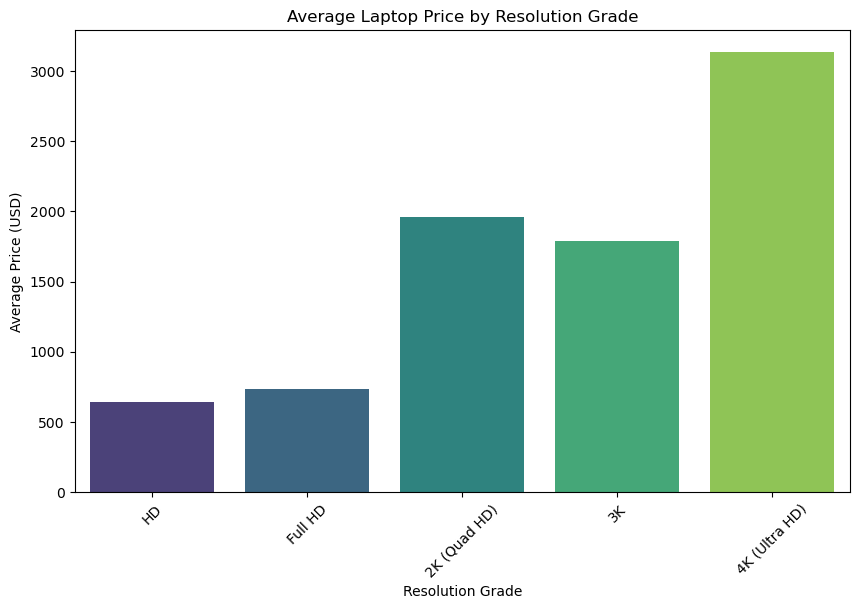

In [15]:
# Set up a barplot for average prices by resolution grade
plt.figure(figsize=(10, 6))
sns.barplot(x='res_grade', y='Price_USD', data=avg_price_by_res_grade, order = ["HD", "Full HD", "2K (Quad HD)", "3K", "4K (Ultra HD)"], palette="viridis")

# Set plot titles and labels
plt.title("Average Laptop Price by Resolution Grade")
plt.xlabel("Resolution Grade")
plt.ylabel("Average Price (USD)")
plt.xticks(rotation=45)
plt.show();

#### Barplot Interpretation

- As the resolution grade improves, the average cost of a laptop increases. This supports the notion that a higher resolution grade can be considered a valuable feature in a device.

- On average, 4K (Ultra HD) resolution is the most expensive laptop screen resolution in this dataset.

- On average, 2K (Quad HD) resolution is slightly more expensive than 3K resolution, although 3K resolution produces a clearer display image.


### Discussion

From the analysis conducted, the key insights include that the prices of laptops with dedicated GPUs are higher than those with integrated GPUs, the average price of laptops with secondary storage is cheaper than those without, and as resolution quality increases, so does the average price of laptops. The boxplots in research question 2 are limited by the number of outliers in the boxplot for laptops without secondary storage. The data assumptions need to be checked for normally distributed samples, independent samples, and approximately equal population variances so that future analyses, such as ANOVA, can be conducted to statistically test the differences in means. In general, to build on this project, statistical hypothesis testing should be conducted to make definitive statements regarding the research questions.

### Reflection

This data science project focused on analyzing laptop pricing trends and helped build foundational skills in data analysis and programming. By using Python and libraries like Pandas, Matplotlib, and Seaborn, the project included analysis such as cleaning the dataset to remove inconsistencies and performing exploratory data analysis (EDA) to explore relationships between features like GPU type, screen resolution, and price. Basic visualization techniques were used to display trends and patterns clearly. These activities provided a introduction to working with data and understanding how to use programming tools to explore the dataset.